# Martin's menace using search algorithms




In [ ]:
# ## Preamble

# # %%
# # Library Imports
# import os
# import pandas as pd
# import datetime

# # Specific libraries
# import seaborn as sns
# from pathlib import Path

# from matplotlib import pyplot
# from shapely.ops import transform, unary_union
# from shapely.geometry import Polygon, MultiPoint, MultiPolygon
# from shapely import affinity

# from fastai.vision.core import PILImage
# from PIL import Image
# import io

# from IPython.display import display, clear_output
# import time
# from descartes.patch import PolygonPatch
# import tqdm

In [2]:
%reload_ext autoreload
%autoreload 2
from utils import search, Piece, Board, plot_level

In [ ]:
# %%
# Environment Variables
# Load environment variables, e.g., API keys, database URIs
# Assuming you have a .env file in your notebook directory or its parent
try:
    from dotenv import load_dotenv

    load_dotenv()
except ImportError:
    print("dotenv not installed. Install it or manually set environment variables.")

DATA_PATH = Path(os.getenv("DATA_PATH", "data"))
# API_KEY = os.getenv("API_KEY")
# DATABASE_URI = os.getenv("DATABASE_URI")

In [ ]:
# %%
# Configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 2)

# Optional: Logging Configuration
import logging

logging.basicConfig(
    level=logging.DEBUG, format="%(asctime)s - %(levelname)s - %(name)s - %(message)s"
)
# Disable logging for Pillow (or any other specific module)
logging.getLogger("PIL").setLevel(logging.CRITICAL)
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

logger = logging.getLogger(__name__)

# %%
logger.info(f"Start {datetime.datetime.now()=}")

In [21]:
piece_T = Piece("T", id_=1, ascii_pattern=["***", " * ", " * "])
piece_s = Piece("s", id_=2, ascii_pattern=[" **", " * ", "** "])
piece_r = Piece("r", id_=3, ascii_pattern=[" **", "** ", " * "])
piece_f = Piece("f", id_=4, ascii_pattern=["* ", "**", "* ", "* "])

assert piece_T != piece_f
assert piece_T.rot(180) == piece_T.flip()
assert piece_f.rot(180) != piece_T.flip()

assert len(piece_T.all_versions()) == 4

pieces_dict = {piece.id: piece for piece in [piece_T, piece_s, piece_r, piece_f]}

[autoreload of utils failed: Traceback (most recent call last):
  File "c:\Users\milen\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\milen\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "c:\Users\milen\AppData\Local\Programs\Python\Python38\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "c:\Users\milen\AppData\Local\Programs\Python\Python38\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "c:\Users\milen\Desktop\git_others\martins-menace\utils.py", line 19, in <module>
    piece_T 

In [18]:
board = Board(d_pieces=pieces_dict).add(piece_f, *(False, 90, -2, -1))
board

x=-2, y=-1
| 4  |
|4444|
| 111|
|  1 |
|  1 |

In [25]:
current_boards = [Board(d_pieces=pieces_dict)]
level_1, best_cost, best_area = search(current_boards, piece=piece_f)
print(f"{len(level_1)=} {best_cost=} {best_area=}")

len(level_1)=77 best_cost=0.0 best_area=15.0                                        


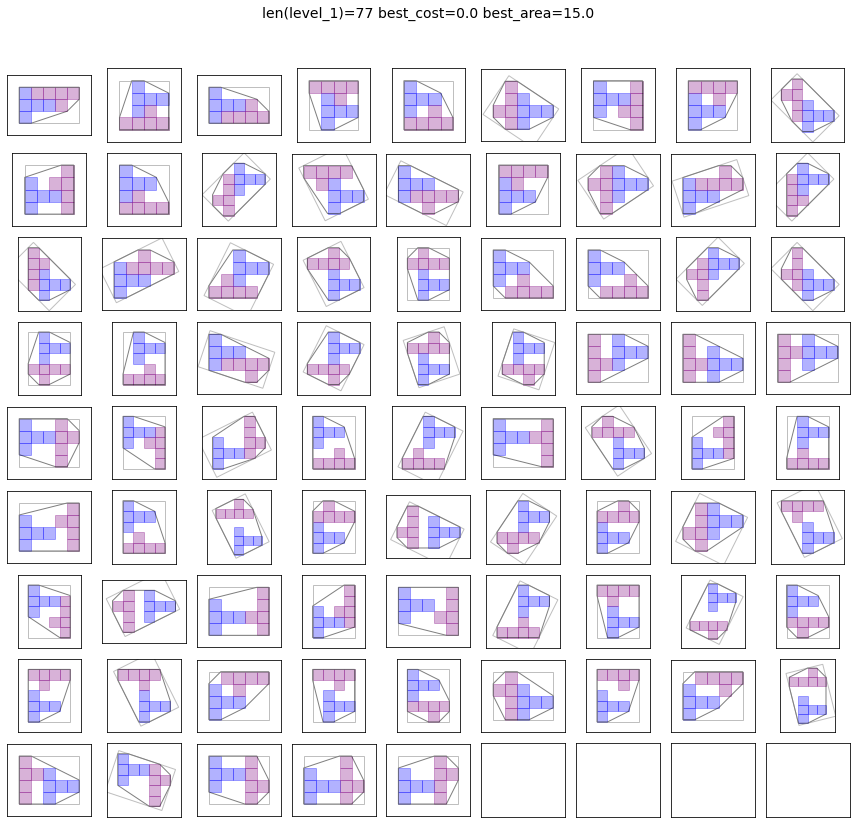

In [26]:
current_boards = [Board()]
level_1, best_cost, best_area = search(current_boards, piece=piece_f)
plot_level(level_1, f"{len(level_1)=} {best_cost=} {best_area=}")

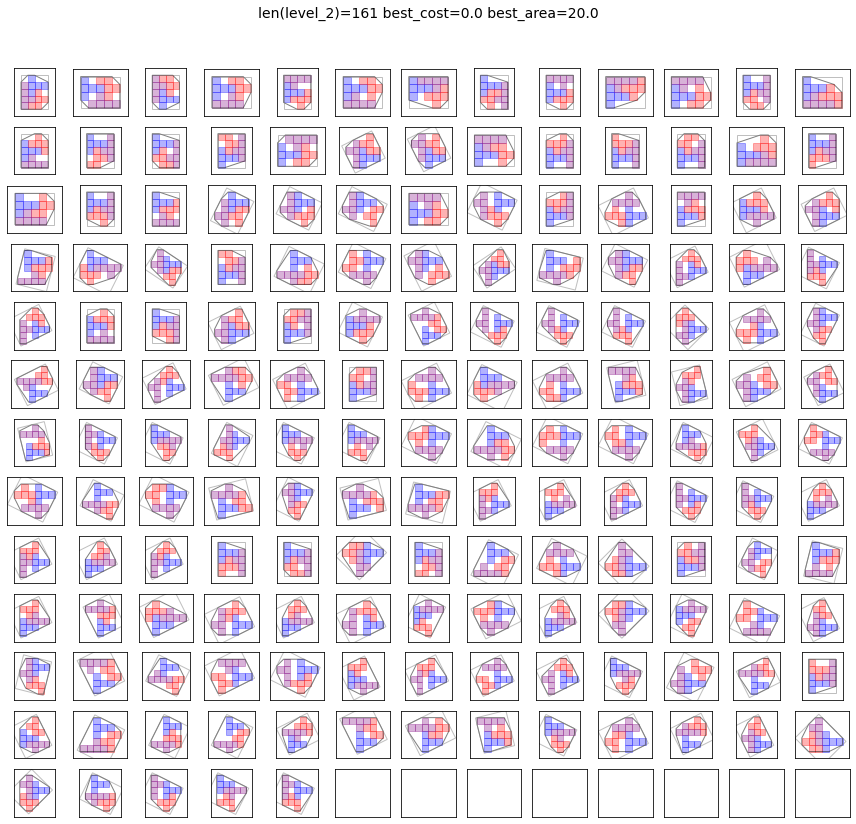

In [27]:
level_2, best_cost, best_area = search(level_1, piece=piece_r)
plot_level(level_2, f"{len(level_2)=} {best_cost=} {best_area=}")

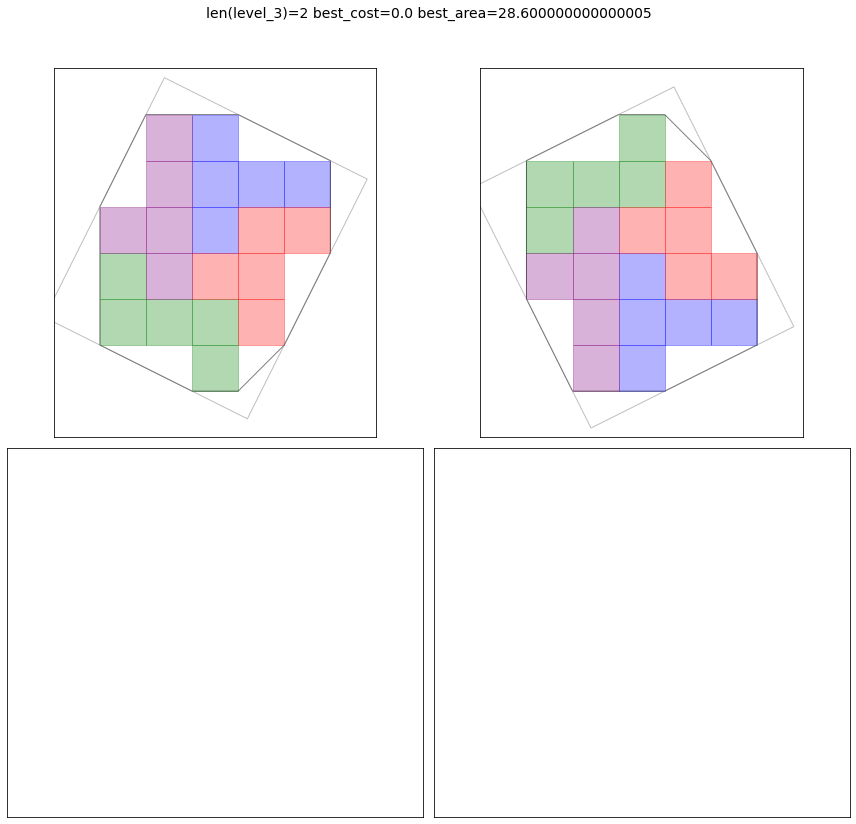

In [28]:
level_3, best_cost, best_area = search(level_2, piece=piece_s)
plot_level(level_3, f"{len(level_3)=} {best_cost=} {best_area=}")